In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, poisson, expon

## Distribution of Amir's sales

In [6]:
amir_deals = pd.read_csv('data/amir_deals.csv', index_col=0)

In [7]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [8]:
amir_deals.shape

(178, 5)

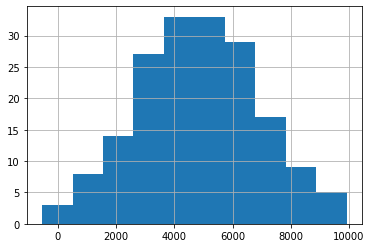

In [15]:
amir_deals['amount'].hist(bins=10)

plt.show()

# Probabilities from the normal distribution

In [16]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [20]:
# Probability of deal < 7500
prob_less_7500 = norm.cdf(7500, 5000, 2000) #angka, #mean, #std

prob_less_7500

0.8943502263331446

In [22]:
# Probability of deal > 1000
prob_over_1000 = 1 - norm.cdf(1000, 5000, 2000)

prob_over_1000

0.9772498680518208

In [23]:
# Probability of deal between 3000 and 7000
prob_3000_to_7000 = norm.cdf(7000, 5000, 2000) - norm.cdf(3000, 5000, 2000)

prob_3000_to_7000

0.6826894921370859

In [24]:
# Calculate amount that 25% of deals will be less than
pct_25 = norm.ppf(0.25, 5000, 2000)

pct_25

3651.0204996078364

## Simulating sales under new market conditions

In [25]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [34]:
new_mean = 5000 + (5000 * 0.2)
new_mean

6000.0

In [35]:
new_sd = 2000 * 1.3
new_sd

2600.0

In [45]:
# Simulate 36 new sales
new_sales = norm.rvs(new_mean, new_sd, size=36)
new_sales

array([ 3498.74647161,  2915.55533858,  3169.74491459,  9041.54385023,
       12593.02244539,  3283.2170412 ,  4143.11108226,  6733.03719359,
        8263.44006019,  7426.7484743 ,  4283.06632029,  8900.19393544,
        9318.5696274 ,  6087.79672068,  4345.5550118 ,  2312.36926439,
        4954.26301827,  7391.96090215,  8657.66901307,  9351.72781424,
        7953.50812694,  4222.82458613,  1546.63746377,  3139.32006666,
        3494.65971492,  9649.23448643,  6495.26185384,  3034.84293834,
        8356.1325672 , 10197.30687311,  3822.54487136,  4648.12902932,
        7758.32532835,  8516.40936167,  3035.54963603,  7131.44095057])

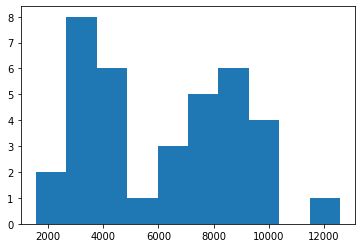

In [46]:
plt.hist(new_sales)
plt.show()

# The central limit theorem

## The CLT in action

In [47]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


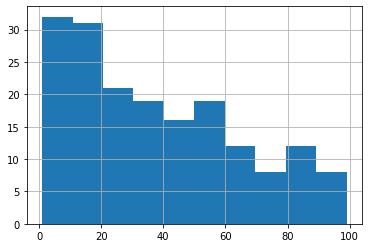

In [48]:
amir_deals['num_users'].hist()
plt.show()

In [53]:
np.random.seed(104)

samp_20 = amir_deals['num_users'].sample(20, replace=True)
print(samp_20)

70      2
143    17
167    11
128     7
9      80
101    48
113    12
120    37
26     16
142     8
4      83
9      80
143    17
60      6
70      2
82     43
25     31
138    89
160    29
80     22
Name: num_users, dtype: int64


In [50]:
np.mean(samp_20)

32.0

In [66]:
np.random.seed(104)

sample_means = []

for i in range(100):
    samp_20 = amir_deals['num_users'].sample(20, replace=True)
    sample_means.append(np.mean(samp_20))

print(sample_means)

[32.0, 31.35, 45.05, 33.55, 38.15, 50.85, 31.85, 34.65, 36.25, 38.9, 44.05, 35.45, 37.6, 37.95, 28.85, 33.3, 31.65, 45.5, 43.2, 24.4, 41.05, 37.2, 39.3, 29.45, 33.55, 45.3, 45.1, 30.95, 36.25, 37.65, 42.55, 34.55, 41.1, 36.9, 42.45, 38.45, 45.9, 42.7, 38.4, 32.55, 30.25, 38.0, 38.75, 49.3, 39.55, 49.05, 42.05, 41.0, 40.6, 58.25, 34.55, 51.2, 34.15, 36.95, 42.45, 41.85, 33.2, 36.15, 37.55, 34.2, 29.75, 42.35, 43.75, 29.0, 32.05, 31.65, 44.6, 30.85, 29.6, 37.7, 33.1, 36.35, 40.65, 45.7, 33.8, 40.1, 39.9, 33.5, 32.65, 32.85, 42.85, 35.4, 31.7, 32.0, 33.85, 36.6, 44.35, 39.9, 37.0, 37.3, 42.5, 38.35, 42.8, 44.55, 30.3, 50.45, 42.35, 40.65, 29.85, 39.3]


In [67]:
np.mean(sample_means)

38.069

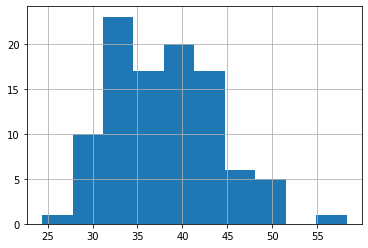

In [54]:
sample_means_series = pd.Series(sample_means)

sample_means_series.hist()
plt.show()

# The mean of means

In [55]:
all_deals = pd.read_csv('data/all_deals.csv')

In [57]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [56]:
all_deals.head()

,product,num_users
0,3544,19
1,5073,43
2,6149,87
3,7863,83
4,14,17


In [64]:
np.random.seed(321)

sample_meansx = []

for i in range(30):
    cur_sample = all_deals['num_users'].sample(20, replace=True)
    sample_meansx.append(np.mean(cur_sample))

print(sample_meansx)

[35.55, 29.9, 44.75, 44.2, 32.4, 32.5, 29.75, 41.65, 39.5, 32.85, 33.3, 40.1, 41.75, 39.45, 28.3, 42.65, 30.05, 35.55, 43.7, 42.9, 33.85, 27.95, 29.0, 40.55, 30.45, 37.7, 42.75, 46.1, 29.7, 42.15]


In [65]:
np.mean(sample_meansx)

36.70000000000001

In [62]:
np.mean(amir_deals['num_users'])

37.651685393258425

# The Poisson distribution

### Tracking lead responses

In [69]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [73]:
# Probability of 5 responses
prob_5 = poisson.pmf(5, 4)

prob_5

0.1562934518505317

In [74]:
# Probability of 5 responses
prob_coworker = poisson.pmf(5, 5.5)

prob_coworker

0.17140068409793663

In [76]:
# Probability of 2 or fewer responses
prob_2_or_less = poisson.cdf(2, 4)

prob_2_or_less

0.23810330555354436

In [77]:
# Probability of > 10 responses
prob_over_10 = 1 - poisson.cdf(10, 4)

prob_over_10

0.0028397661205137315

# More probability distributions

## Modeling time between leads

In [78]:
amir_deals.head()

,product,client,status,amount,num_users
1,Product F,Current,Won,7389.52,19
2,Product C,New,Won,4493.01,43
3,Product B,New,Won,5738.09,87
4,Product I,Current,Won,2591.24,83
5,Product E,Current,Won,6622.97,17


In [82]:
# Print probability response takes < 1 hour
expon.cdf(1, scale=2.5)

0.3296799539643607

In [85]:
# Print probability response takes > 4 hours
print(1 - expon.cdf(4, scale=2.5))

0.20189651799465536


In [86]:
# Print probability response takes 3-4 hours
print(expon.cdf(4, scale=2.5) - expon.cdf(3, scale=2.5))

0.09929769391754684
